In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD

# 데이터 불러오기
train_data = pd.read_csv('data/train.csv')  # train.csv 데이터
test_data = pd.read_csv('data/test.csv')    # test.csv 데이터

# Extract the features and target from the training dataset
X_train = train_data.drop(columns=['ID', 'y']).values.T  # Transpose for DMD input
y_train = train_data['y'].values

# Prepare test data (remove 'ID' column and transpose)
X_test = test_data.drop(columns=['ID']).values.T



In [11]:
# Fit DMD on the training data
dmd = DMD(svd_rank=5)  # svd_rank defines the number of modes to keep
dmd.fit(X_train, y_train)

ValueError: Expected at least a 2D matrix (space x time).

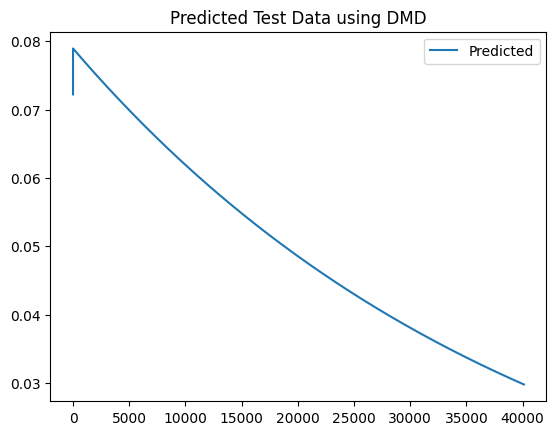

In [10]:
# Use the DMD model to predict the future states based on test data
X_test_dmd = dmd.reconstructed_data.real

# We use the predicted values to make predictions (selecting the last feature/row as prediction)
y_pred = X_test_dmd[-1, :]

# Save or plot predictions
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted Test Data using DMD')
plt.show()

In [ ]:
print()